# Reading Data

In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('2022.csv')
print(data.shape)

(438693, 303)


In [3]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [4]:
datatypes=list(set(list(data.dtypes)))


Types of data are- int64 and float64 

More info about data-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Columns: 303 entries, _STATE to _VEGETE1
dtypes: float64(298), int64(5)
memory usage: 1014.1 MB
None


In [ ]:
print("Types of data are-",datatypes[0],"and",datatypes[1],"\n")
print("More info about data-")
print(data.info())

# Pre-processing

In [5]:
dataframe = data.copy()

In [6]:
dataframe1=pd.DataFrame(dataframe)

In [7]:
print("Shape before removing unnecessary data-",dataframe1.shape)
dataframe1 = dataframe1.drop(columns = ['FMONTH','DISPCODE','SEQNO','PVTRESD1','HHADULT', 'STATERE1', 'CELPHON1', 'COLGHOUS', 'CTELNUM1', 'CCLGHOUS', 'CTELENM1'], axis=1)

dataframe1 = dataframe1.drop(columns = ['IMONTH', 'IDAY', 'IDATE', 'IYEAR'], axis=1)
for cols in dataframe1.columns:
    if cols.startswith("_") and cols!="RACE":
        dataframe1.drop(cols,axis=1,inplace=True)
print("Shape after removing unnecessary data-",dataframe1.shape)

Shape before removing unnecessary data- (438693, 303)
Shape after removing unnecessary data- (438693, 216)


In [8]:
columnswithsamevalue = dataframe1.std()[dataframe1.std() == 0].index
print("Columns that have fixed value-",columnswithsamevalue)
dataframe1.drop(columnswithsamevalue, axis=1, inplace=True)
dataframe1.shape

Columns that have fixed value- Index(['SAFETIME', 'CELLFON5', 'CADULT1'], dtype='object')


(438693, 213)

In [9]:
dataframe1.drop(['HAVECFS'],axis=1,inplace=True)
dataframe1.drop(['WORKCFS'],axis=1,inplace=True)
dataframe1.drop(['TOLDCFS'],axis=1,inplace=True)

In [10]:
dataframe1.shape

(438693, 210)

In [11]:
dataframe2=dataframe1.fillna(-1)
dataframe2.shape

(438693, 210)

In [12]:
labeldata=dataframe2['DIABETE4']
print(dataframe2.shape)
dataframe2=dataframe2.drop(columns=['DIABETE4'])
print(dataframe2.shape)

(438693, 210)
(438693, 209)


In [13]:
corrmatrix = dataframe2.corr().abs()

In [14]:
high_corrcol = []
for i in range(1,corrmatrix.shape[0]-1):
    for j in range(0,i):
        if corrmatrix.iloc[i][j] > 0.85:
            high_corrcol.append(corrmatrix.columns[j])
columns_to_drop=(list(set(high_corrcol)))
print("Columns to be dropped-",len(columns_to_drop))
print("Shape after dropping columns-",dataframe2.shape)

Columns to be dropped- 59
Shape after dropping columns- (438693, 209)


In [15]:
dataframe2.drop(columns_to_drop,axis = 1, inplace=True)
print(dataframe2.shape)
dataframe2.insert(len(dataframe2.columns), 'DIABETE4', labeldata)
print(dataframe2.shape)

(438693, 150)
(438693, 151)


In [16]:
prediction=dataframe2[['DIABETE4']]
value1 = prediction["DIABETE4"].value_counts()

In [17]:
print('Shape of DataFrame Before Removing Outliers', dataframe2.shape )
dataframe2=dataframe2[(np.abs(stats.zscore(dataframe2)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', dataframe2.shape )

Shape of DataFrame Before Removing Outliers (438693, 151)
Shape of DataFrame After Removing Outliers (106429, 151)


In [18]:
predictionX = dataframe2.loc[:, dataframe2.columns != 'DIABETE4']
predictionY = dataframe2['DIABETE4']
x_train, x_test, y_train, y_test = train_test_split(predictionX, predictionY, test_size=0.2, train_size = 0.8,)

# Classifying

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print("Logistic Regression-")
print(classification_report(y_test, predicted))
print ("The accuracy of Logistic Regression is-", accuracy_score(y_test, predicted)*100, "%")
print("F1 score for logistic regression is-",f1_score(y_test, predicted,average='weighted')*100, "%")

Logistic Regression-
              precision    recall  f1-score   support

         1.0       0.37      0.03      0.05      1684
         2.0       0.00      0.00      0.00       204
         3.0       0.89      1.00      0.94     18949
         4.0       0.00      0.00      0.00       449

    accuracy                           0.89     21286
   macro avg       0.31      0.26      0.25     21286
weighted avg       0.82      0.89      0.84     21286

The accuracy of Logistic Regression is- 88.88941088039087 %
F1 score for logistic regression is- 84.15750170693488 %


In [21]:
from xgboost import XGBClassifier

In [22]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(x_train,y_train-1)
predicted = xgbc.predict(x_test)
predicted = predicted + 1
print("XGBoost-")
print(classification_report(y_test, predicted))
print ("The accuracy of XGBoost is-", accuracy_score(y_test, predicted)*100, "%")
print("F1 score for XGBoost is-",f1_score(y_test, predicted,average='weighted')*100, "%")

XGBoost-
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1684
         2.0       0.00      0.00      0.00       204
         3.0       0.97      1.00      0.98     18949
         4.0       0.00      0.00      0.00       449

    accuracy                           0.97     21286
   macro avg       0.49      0.50      0.50     21286
weighted avg       0.94      0.97      0.95     21286

The accuracy of XGBoost is- 96.93225594287324 %
F1 score for XGBoost is- 95.42436556030223 %


In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
predicted =[round(i) for i in predicted]
print("Random Forest-")
print(classification_report(y_test, predicted))
print("The accuracy of Random Forest is-", accuracy_score(y_test, predicted)*100, "%")
print("F1 score for Random Forest is-",f1_score(y_test, predicted,average='weighted')*100, "%")

Random Forest-
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1684
         2.0       0.00      0.00      0.00       204
         3.0       0.97      1.00      0.98     18949
         4.0       0.00      0.00      0.00       449

    accuracy                           0.97     21286
   macro avg       0.49      0.50      0.50     21286
weighted avg       0.94      0.97      0.95     21286

The accuracy of Random Forest is- 96.91346424880203 %
F1 score for Random Forest is- 95.41497143436544 %


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print("Decision Tree-")
print(classification_report(y_test, predicted))
print ("Accuracy for Decision Tree is-",accuracy_score(y_test,predicted)*100,"%")
print("F1 score for Decision Tree is-",f1_score(y_test, predicted,average='weighted')*100, "%") 

Decision Tree-
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1684
         2.0       0.00      0.00      0.00       204
         3.0       0.97      1.00      0.98     18949
         4.0       0.00      0.00      0.00       449

    accuracy                           0.97     21286
   macro avg       0.49      0.50      0.50     21286
weighted avg       0.94      0.97      0.95     21286

Accuracy for Decision Tree is- 96.93225594287324 %
F1 score for Decision Tree is- 95.42436556030223 %


# Visualization

In [27]:
import matplotlib.pyplot as plt

In [28]:
data1=data.copy()
dataframe3=pd.DataFrame(data1)

In [29]:
da1 = dataframe3.loc[dataframe3['DIABAGE3'].isin([1,2,3,4,5,6,7,8,9,10])]
da2 = dataframe3.loc[dataframe3['DIABAGE3'].isin([11,12,13,14,15,16,17,18,19,20])]
da3 = dataframe3.loc[dataframe3['DIABAGE3'].isin([21,22,23,24,25,26,27,28,29,30])]
da4 = dataframe3.loc[dataframe3['DIABAGE3'].isin([31,32,33,34,35,36,37,38,39,40])]
da5 = dataframe3.loc[dataframe3['DIABAGE3'].isin([41,42,43,44,45,46,47,48,49,50])]
da6 = dataframe3.loc[dataframe3['DIABAGE3'].isin([51,52,53,54,55,56,57,58,59,60])]
da7 = dataframe3.loc[dataframe3['DIABAGE3'].isin([61,62,63,64,65,66,67,68,69,70])]
da8 = dataframe3.loc[dataframe3['DIABAGE3'].isin([71,72,73,74,75,76,77,78,79,80])]
da9 = dataframe3.loc[dataframe3['DIABAGE3'].isin([81,82,83,84,85,86,87,88,89,90])]
da10 = dataframe3.loc[dataframe3['DIABAGE3'].isin([91,92,93,94,95,96,97,98])]

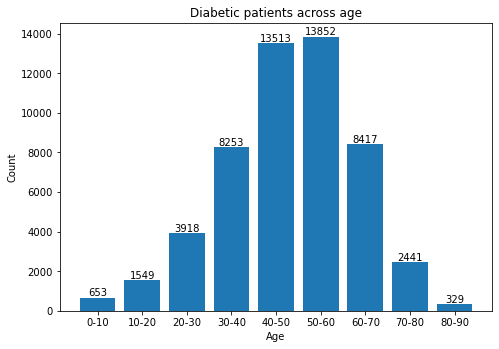

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
counts=[da1.shape[0],da2.shape[0],da3.shape[0],da4.shape[0],da5.shape[0],da6.shape[0],da7.shape[0],da8.shape[0],da9.shape[0]]
ages = ['0-10','10-20','20-30','30-40','40-50', '50-60','60-70','70-80','80-90']
p=ax.bar(ages,counts)
ax.bar_label(p)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Diabetic patients across age')
plt.show()

In [31]:
data1['PREDIAB1'].replace(2,1,inplace=True)
data1['PREDIAB1'].replace(7,np.nan,inplace=True)
data1['PREDIAB1'].replace(9,np.nan,inplace=True)
data1['DIABETE4'].replace(2,1,inplace=True)
data1['DIABETE4'].replace(4,2,inplace=True)
data1['DIABETE4'].replace(3,2,inplace=True)
data1['DIABETE4'].replace(7,np.nan,inplace=True)
data1['DIABETE4'].replace(9,np.nan,inplace=True)

In [32]:
plt.figure()
dataframe4 = data1.groupby(['DIABETE4','PREDIAB1']).size()
previousdiabetic=dataframe4.unstack()
previousdiabpercent= previousdiabetic.div(previousdiabetic.sum())

<Figure size 432x288 with 0 Axes>

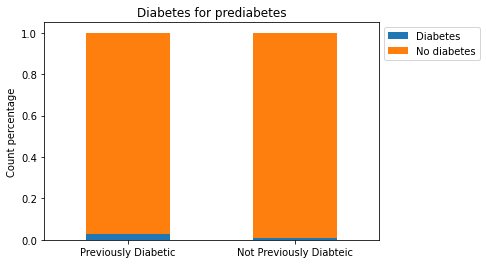

In [33]:
predictionp=previousdiabpercent.transpose()
predictionp
ax2 =predictionp.plot(kind='bar',stacked=True).legend(["Diabetes", "No diabetes"], bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1)
labels = ("Previously Diabetic", "Not Previously Diabteic")
plt.xticks(positions, labels,rotation ='horizontal')
plt.ylabel('Count percentage')
plt.xlabel('')
plt.title("Diabetes for prediabetes")
plt.show()